In [1]:
import sys

In [2]:
%pylab inline
import pandas as pd
import catboost as cat

Populating the interactive namespace from numpy and matplotlib


# cat

In [4]:
params= !ls *param*.csv|grep cat
params

['cat_params_L1F1.grid1.csv',
 'cat_params_L1F1.grid2.csv',
 'cat_params_L1F1.grid3.csv',
 'cat_params_L1F2.grid1.csv',
 'cat_params_L1F4.grid1.csv',
 'cat_params_L1F6.grid1.csv',
 'cat_params_L1F7.grid1.csv',
 'cat_params_MAE.grid1.csv']

In [5]:
keys=['MAE','F1','F2','F4','F6','F7']

In [6]:
def f(k,n=10):
    files=[u for u in params if k in u]
    print k,files
    df=pd.concat([pd.read_csv(u,index_col=0) for u in files]).sort_values("score")
    df['params']=df['params'].map(lambda u: eval(u))
    df['percent']=df['score']/df['score'].min()
    print df.shape
    plt.hist(df['percent']);plt.show()
    pdf=pd.DataFrame(dict(enumerate(df[:n]['params'].map(lambda u: pd.Series(u)).values))).T
    pdf['score']=df[:n]['score'].values
    display(pdf)
    param={}
    for col in pdf.columns:
        if col=='score': continue
        vc=pdf[col].value_counts().sort_values(ascending=False)
        param[str(col)]=vc.index[0]
    return param

In [7]:
xg_params={}

MAE ['cat_params_MAE.grid1.csv']
(72, 3)


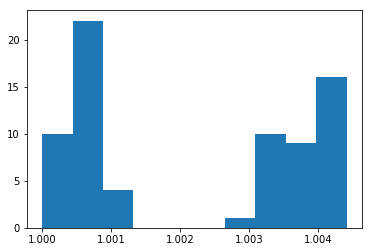

border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0          128              0.7           2               Gradient   
1           64                1           3               Gradient   
2           64              0.7           1               Gradient   
3           64                1           3               Gradient   
4           64              0.7           3               Gradient   
5          128              0.5           3               Gradient   
6          128              0.7           3               Gradient   
7          128                1           2               Gradient   
8          128              0.5           3               Gradient   
9          128              0.7           2               Gradient   

  learning_rate max_depth      objective     score  
0          0.03         6  MAE:alpha=0.5  0.067853  
1          0.03         6  MAE:alpha=0.5  0.067855  
2          0.03         6  MAE:alpha=0.5  0.067862  
3          0.03         4  MAE:alpha=0.5  0.067863  
4          0.03         4  MAE:alpha=0.5  0.067870  
5          0.03         6  MAE:alpha=0.5  0.067871  
6          0.03         6  MAE:alpha=0.5  0.067875  
7          0.03         6  MAE:alpha=0.5  0.067877  
8          0.03         4  MAE:alpha=0.5  0.067880  
9          0.03         4  MAE:alpha=0.5  0.067882

In [8]:
i=0
key=keys[i]
param=f(keys[i])

In [9]:
xg_params[key]=param
param

{'border_count': 128,
 'colsample_bytree': 0.69999999999999996,
 'l2_leaf_reg': 3,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.029999999999999999,
 'max_depth': 6,
 'objective': 'MAE:alpha=0.5'}

F1 ['cat_params_L1F1.grid1.csv', 'cat_params_L1F1.grid2.csv', 'cat_params_L1F1.grid3.csv']
(208, 3)


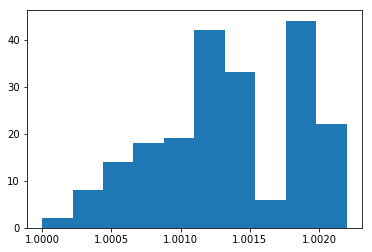

C border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0   0.01          128                1           2               Gradient   
1   0.01          128              0.7           1               Gradient   
2   0.01          128                1           1               Gradient   
3  0.001          128                1           2               Gradient   
4  0.001          128              0.7           1               Gradient   
5  0.001          128                1           1               Gradient   
6   0.01          128              0.7           2               Gradient   
7   0.01          128              0.7           2               Gradient   
8  0.001          128              0.7           2               Gradient   
9   0.01          128              0.7           1               Gradient   

  learning_rate max_depth objective     score  
0          0.03        10      L1F1  0.068521  
1          0.03        10      L1F1  0.068530  
2          0.03        10      L1F1  0.068537  
3          0.03        10      L1F1  0.068544  
4           0.1        10      L1F1  0.068545  
5          0.03        10      L1F1  0.068545  
6          0.03        10      L1F1  0.068547  
7          0.03         8      L1F1  0.068548  
8          0.03        10      L1F1  0.068549  
9          0.03         8      L1F1  0.068551

In [10]:
i=1
key=keys[i]
param=f(keys[i])

In [11]:
xg_params[key]=param
param

{'C': 0.01,
 'border_count': 128,
 'colsample_bytree': 0.69999999999999996,
 'l2_leaf_reg': 1,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.029999999999999999,
 'max_depth': 10,
 'objective': 'L1F1'}

F2 ['cat_params_L1F2.grid1.csv']
(144, 3)


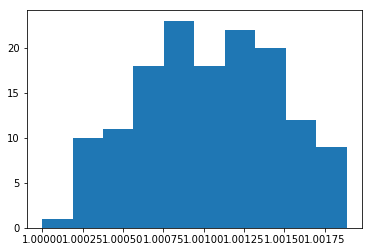

C border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0     1          128              0.7           1               Gradient   
1   0.1          128              0.7           1               Gradient   
2  0.01          128                1           2               Gradient   
3  0.01          128              0.5           2               Gradient   
4  0.01          128              0.5           1               Gradient   
5     1           64              0.7           1               Gradient   
6  0.01           64                1           2               Gradient   
7   0.1          128                1           1               Gradient   
8   0.1           64              0.7           2               Gradient   
9  0.01          128              0.7           1               Gradient   

  learning_rate max_depth objective     score  
0          0.03         6      L1F2  0.068505  
1          0.03         6      L1F2  0.068520  
2          0.03         6      L1F2  0.068520  
3          0.03         6      L1F2  0.068524  
4          0.03         6      L1F2  0.068528  
5          0.03         6      L1F2  0.068528  
6           0.1         6      L1F2  0.068528  
7          0.03         6      L1F2  0.068528  
8          0.03         6      L1F2  0.068529  
9          0.03         6      L1F2  0.068531

In [12]:
i=2
key=keys[i]
param=f(keys[i])

In [13]:
xg_params[key]=param
param

{'C': 0.01,
 'border_count': 128,
 'colsample_bytree': 0.69999999999999996,
 'l2_leaf_reg': 1,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.029999999999999999,
 'max_depth': 6,
 'objective': 'L1F2'}

F4 ['cat_params_L1F4.grid1.csv']
(144, 3)


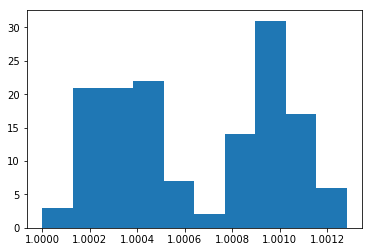

C border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0   0.1           64              0.7           1               Gradient   
1  0.01           64              0.7           1               Gradient   
2  0.01           64                1           2               Gradient   
3     1           64                1           1               Gradient   
4   0.1           64                1           1               Gradient   
5   0.1          128              0.5           2               Gradient   
6  0.01           64              0.5           1               Gradient   
7  0.01          128                1           1               Gradient   
8   0.1          128                1           1               Gradient   
9  0.01          128                1           2               Gradient   

  learning_rate max_depth objective     score  
0           0.1         6      L1F4  0.068587  
1           0.1         6      L1F4  0.068588  
2           0.1         6      L1F4  0.068591  
3           0.1         6      L1F4  0.068596  
4           0.1         6      L1F4  0.068597  
5           0.1         6      L1F4  0.068597  
6           0.1         6      L1F4  0.068597  
7          0.03         6      L1F4  0.068599  
8          0.03         6      L1F4  0.068600  
9          0.03         6      L1F4  0.068600

In [14]:
i=3
key=keys[i]
param=f(keys[i])

In [15]:
xg_params[key]=param
param

{'C': 0.01,
 'border_count': 64,
 'colsample_bytree': 1.0,
 'l2_leaf_reg': 1,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.10000000000000001,
 'max_depth': 6,
 'objective': 'L1F4'}

F6 ['cat_params_L1F6.grid1.csv']
(144, 3)


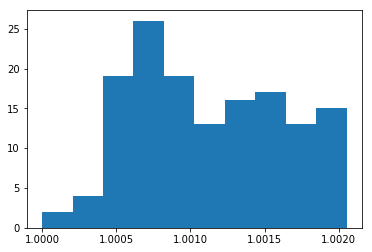

C border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0   0.1           64                1           1               Gradient   
1   0.1          128                1           2               Gradient   
2  0.01          128              0.7           1               Gradient   
3   0.1          128              0.5           1               Gradient   
4   0.1          128                1           1               Gradient   
5   0.1           64                1           2               Gradient   
6   0.1           64              0.5           2               Gradient   
7   0.1           64              0.7           2               Gradient   
8   0.1           64              0.7           1               Gradient   
9     1           64                1           1               Gradient   

  learning_rate max_depth objective     score  
0           0.1         6      L1F6  0.068489  
1           0.1         6      L1F6  0.068492  
2           0.1         6      L1F6  0.068509  
3           0.1         6      L1F6  0.068512  
4           0.1         6      L1F6  0.068513  
5          0.03         6      L1F6  0.068517  
6           0.1         6      L1F6  0.068518  
7          0.03         6      L1F6  0.068522  
8           0.1         6      L1F6  0.068522  
9           0.1         6      L1F6  0.068523

In [16]:
i=4
key=keys[i]
param=f(keys[i])

In [17]:
xg_params[key]=param
param

{'C': 0.10000000000000001,
 'border_count': 64,
 'colsample_bytree': 1.0,
 'l2_leaf_reg': 1,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.10000000000000001,
 'max_depth': 6,
 'objective': 'L1F6'}

F7 ['cat_params_L1F7.grid1.csv']
(144, 3)


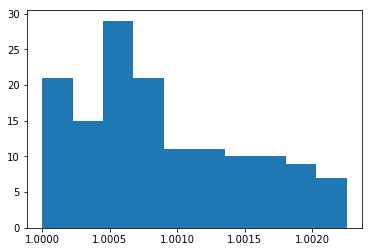

C border_count colsample_bytree l2_leaf_reg leaf_estimation_method  \
0     1          128                1           1               Gradient   
1  0.01          128              0.5           1               Gradient   
2   0.1           64                1           1               Gradient   
3   0.1           64                1           2               Gradient   
4   0.1           64                1           1               Gradient   
5  0.01          128                1           2               Gradient   
6     1          128                1           2               Gradient   
7  0.01           64              0.5           1               Gradient   
8     1          128              0.5           1               Gradient   
9  0.01           64              0.5           2               Gradient   

  learning_rate max_depth objective     score  
0          0.03         6      L1F7  0.068457  
1           0.1         6      L1F7  0.068458  
2          0.03         6      L1F7  0.068460  
3           0.1         6      L1F7  0.068462  
4           0.1         6      L1F7  0.068462  
5           0.1         6      L1F7  0.068463  
6           0.1         6      L1F7  0.068464  
7           0.1         6      L1F7  0.068465  
8           0.1         6      L1F7  0.068465  
9           0.1         6      L1F7  0.068465

In [18]:
i=5
key=keys[i]
param=f(keys[i])

In [19]:
xg_params[key]=param
param

{'C': 0.01,
 'border_count': 128,
 'colsample_bytree': 1.0,
 'l2_leaf_reg': 1,
 'leaf_estimation_method': 'Gradient',
 'learning_rate': 0.10000000000000001,
 'max_depth': 6,
 'objective': 'L1F7'}

In [20]:
len(xg_params),len(keys)

(6, 6)

In [21]:
xg_params

{'F1': {'C': 0.01,
  'border_count': 128,
  'colsample_bytree': 0.69999999999999996,
  'l2_leaf_reg': 1,
  'leaf_estimation_method': 'Gradient',
  'learning_rate': 0.029999999999999999,
  'max_depth': 10,
  'objective': 'L1F1'},
 'F2': {'C': 0.01,
  'border_count': 128,
  'colsample_bytree': 0.69999999999999996,
  'l2_leaf_reg': 1,
  'leaf_estimation_method': 'Gradient',
  'learning_rate': 0.029999999999999999,
  'max_depth': 6,
  'objective': 'L1F2'},
 'F4': {'C': 0.01,
  'border_count': 64,
  'colsample_bytree': 1.0,
  'l2_leaf_reg': 1,
  'leaf_estimation_method': 'Gradient',
  'learning_rate': 0.10000000000000001,
  'max_depth': 6,
  'objective': 'L1F4'},
 'F6': {'C': 0.10000000000000001,
  'border_count': 64,
  'colsample_bytree': 1.0,
  'l2_leaf_reg': 1,
  'leaf_estimation_method': 'Gradient',
  'learning_rate': 0.10000000000000001,
  'max_depth': 6,
  'objective': 'L1F6'},
 'F7': {'C': 0.01,
  'border_count': 128,
  'colsample_bytree': 1.0,
  'l2_leaf_reg': 1,
  'leaf_estimation_

In [22]:
import cPickle as pickle

In [23]:
pickle.dump(xg_params,open("cat_params.pkl",'wb'))